# Exercise 2


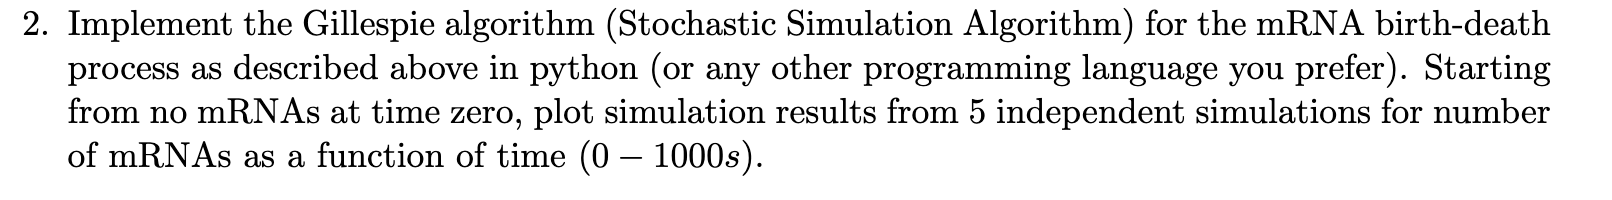


In [1]:
from ssa import SSA

In [2]:
max_time_sec = 1000
timestep_sec = 0.5
timesteps = int(max_time_sec / timestep_sec)

k0 = 0.2
k1 = 0.01

ssa = SSA(k0_production_rate_const=k0, k1_degradation_rate_const=k1)

print(f"{timesteps=}")

timesteps=2000


In [3]:
simulation_results = []

for i in range(5):
    print(f"Starting simulation no. {i} ...")
    simulation_results.append(
        ssa.run_simulation(
            timesteps=timesteps,
            initial_mRNA_level=0,
            start_time=0.0,
            timestep_sec=timestep_sec,
        )
    )

Starting simulation no. 0 ...
Starting simulation no. 1 ...
Starting simulation no. 2 ...
Starting simulation no. 3 ...
Starting simulation no. 4 ...


In [4]:
import matplotlib.pyplot as plt

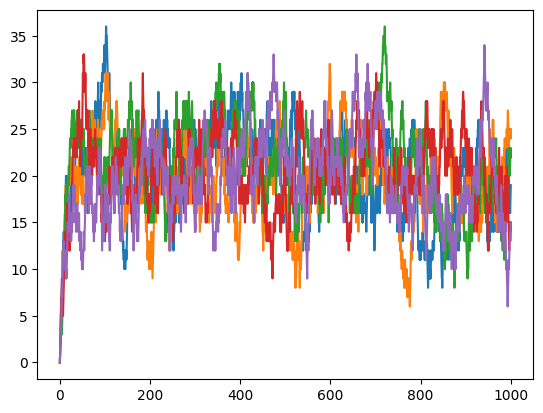

In [9]:
# TODO: plot all graphs in one grid

for sim in simulation_results:
    time, mrna = sim
    plt.plot(time, mrna)